Polar Plot for Purple Box (Figure 7) - RAN

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
from collections import Counter

In [2]:
def data_frame_4 (path,files):
    
    output_folder = sorted(glob.glob("{}{}/*.txt".format(path,files)))
    df_all_rows = pd.concat([pd.read_csv(item,header=None,delim_whitespace=True) for item in output_folder],axis = 0,ignore_index=True)
    df = df_all_rows[df_all_rows[3] >= 773.]
    input_azimuth_list = []
    input_elevation_list = []

    for full_path in output_folder:
        input_azimuth_list.append(int(full_path[33:36]))
        input_elevation_list.append(int(full_path[39:41]))
    
    input_azimuth = np.array(input_azimuth_list)
    input_elevation = np.array(input_elevation_list)
    power = df[3].to_numpy(dtype=float)
    output_azimuth_180 = df[4].to_numpy(dtype=float)
    output_azimuth_list = [angle + 360 if angle < 0 else angle for angle in output_azimuth_180]
    output_azimuth = np.array(output_azimuth_list)
    output_elevation = df[5].to_numpy(dtype=float)
    
    return(input_azimuth,input_elevation,power,output_azimuth,output_elevation)


In [3]:
'Opening Aliased Data:'

path = 'aliased_dataset/'
files = '5_40_MHz/files'
input_azimuth,input_elevation,power,output_azimuth,output_elevation = data_frame_4(path,files)

X = np.reshape(input_azimuth,(181,41))
Y = np.reshape(input_elevation,(181,41))
Z_az_4 = np.reshape(output_azimuth,(181,41))

X = np.reshape(input_azimuth,(181,41))
Y = np.reshape(input_elevation,(181,41))
Z_el_4 = np.reshape(output_elevation,(181,41))

In [4]:
'Opening Measured Data:'

filenumber = 0
filepath = 'figure7_dataset/purple_box/'
filepath_len = len(filepath)
files2fce = glob.glob('{}*-2.csv'.format(filepath))
files4fce = glob.glob('{}*-4.csv'.format(filepath))
file2 = files2fce[filenumber]
file4 = files4fce[filenumber]
filename = file2[ filepath_len : filepath_len + 18 ]

In [5]:
'Data Framing:'

df2 = pd.read_csv(file2,header=None,delim_whitespace=True)
df4 = pd.read_csv(file4,header=None,delim_whitespace=True)
freq2 = df2[1].to_numpy()
freq4 = df4[1].to_numpy()
ele2 = df2[3].to_numpy()
azi2 = df2[4].to_numpy()
ele4 = df4[3].to_numpy()
azi4 = df4[4].to_numpy()
data_degrees2 = list(zip(azi2,ele2))
data_degrees4 = list(zip(azi4,ele4))
data_radians2 = [(np.deg2rad(a), r) for a, r in data_degrees2]
data_radians4 = [(np.deg2rad(a), r) for a, r in data_degrees4]
data_array2 = np.array(data_radians2)
data_array4 = np.array(data_radians4)

In [6]:
def find_alias_4(test_el,test_az,text_output=False):
    
#create testpoint
    testpoint = np.array([test_el,test_az])
# initialize filtered arrays to all zeros
    elfiltered = np.zeros((180,40),dtype=int)
    azfiltered = np.zeros((180,40),dtype=int)
# filtering process
    for i in range(180):
        for j in range(40):
            if abs(Z_el_4[i,j]-testpoint[0]) <= 1:
                elfiltered[i,j] = 1
            if abs(Z_az_4[i,j] - testpoint[1]) <= 1:
                azfiltered[i,j] = 1
# finding solutions
    solution = []
    count = 0 #counter for the number of solutions
    for i in range(180):
        for j in range(40):
            if elfiltered[i,j] == 1 and azfiltered[i,j]==1:
                count += 1
                solution.append([5+j*2,2*i])
    if text_output == True:
        # output solutions
        if count == 0:
            print("There are no solutions.")
        else:
            print(f"Total solutions found: {count}") 
            for sol in solution:
                print(f"Solution: Elevation {sol[0]}, Azimuth {sol[1]}")
    return(testpoint, count, solution)

In [7]:
'Saving All Solutions as a List of Dictionaries:'

all_solutions = []
for (el, az) in zip(ele4,azi4):
    testpoint, count, solution = find_alias_4(el,az)
    all_solutions.append({"real_el_and_az":testpoint,"count":count, "solutions":solution})

In [8]:
test = []
for entry in all_solutions:
    for solution in entry["solutions"]:
        test.append(solution)
el_solns_4 = [item[0] for item in test]
az_solns = [item[1] for item in test]

az_solns_radians_4 = np.deg2rad(az_solns)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  # Remove the CWD from sys.path while we load stuff.


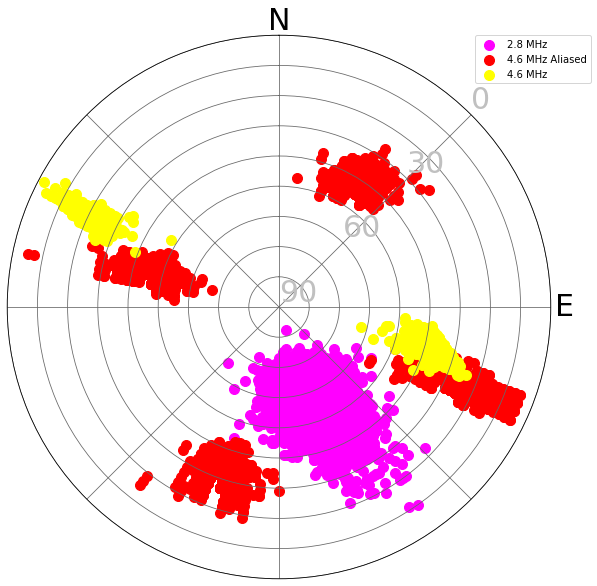

In [10]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='polar')
ax.set_rlim(bottom=90, top=0)
ax.xaxis.grid(True,color='dimgray')
ax.yaxis.grid(True,color='dimgray')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.set_yticklabels(['0','','','30','','','60','','','90'],fontsize=30,color='silver')
ax.set_rlabel_position(45.0)
ax.set_xticklabels(['N', '', 'E', '', '', '', '', ''],fontsize=30,color='k')

ax.scatter(data_array2[:, 0], data_array2[:, 1], color='magenta', s=100, alpha=1, label='2.8 MHz')
ax.scatter(az_solns_radians_4, el_solns_4, color='r', s=100, alpha=1, label='4.6 MHz Aliased')
ax.scatter(data_array4[:, 0], data_array4[:, 1], color='yellow', s=100, alpha=1, label='4.6 MHz')

ax.legend(bbox_to_anchor=(0.86, 1), loc='upper left', borderaxespad=0)
#plt.savefig('figures/figure7/figure7_polar_plots_purple_box.png',transparent=True)
plt.show()